In [1]:
import pandas as pd
df = pd.read_csv("c:/data/customer/customer.csv")
df.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [2]:
cols=["Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']
X=df[cols]
y=df['Churn']
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Churn'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp['Churn'].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [4]:
X=df_samp[cols]
y=df_samp['Churn']

<AxesSubplot:>

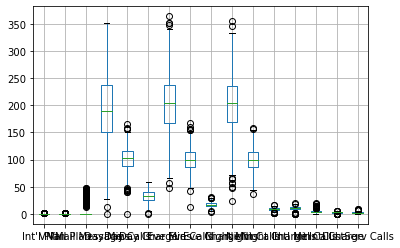

In [5]:
X.boxplot()


In [6]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

<AxesSubplot:>

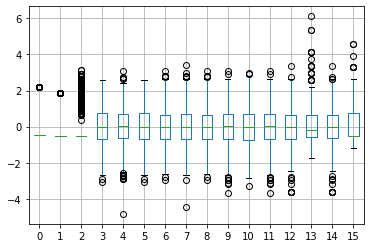

In [7]:
X_scaled.boxplot()

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
svm = SVC()
n_estimators = 10
model = BaggingClassifier(base_estimator=svm,
n_estimators=n_estimators,
max_samples=1/n_estimators,
n_jobs=-1)

In [9]:
import numpy as np
from sklearn.model_selection import cross_val_score
costs = np.logspace(-10, 3, 14) # 10의 -10승부터 10의 3승까지 14개의 구간
scores = []
for c in costs:
    model.base_estimator.C = c # 분류기의 C 파라미터
    #교차검증
    this_scores = cross_val_score(model, X_scaled, y, n_jobs=2, cv=3) # 3회 교차검증
    m=np.mean(this_scores)
    print(c,'==>',m)
    scores.append(m)
print('max:',max(scores))
print('idx:',np.argmax(scores))
print('C:',costs[np.argmax(scores)])

1e-10 ==> 0.5
1e-09 ==> 0.556935817805383
1e-08 ==> 0.5
1e-07 ==> 0.5714285714285715
1e-06 ==> 0.5
1e-05 ==> 0.5
0.0001 ==> 0.5662525879917184
0.001 ==> 0.5600414078674948
0.01 ==> 0.5942028985507246
0.1 ==> 0.5
1.0 ==> 0.7929606625258799
10.0 ==> 0.7877846790890269
100.0 ==> 0.8002070393374741
1000.0 ==> 0.7857142857142856
max: 0.8002070393374741
idx: 12
C: 100.0


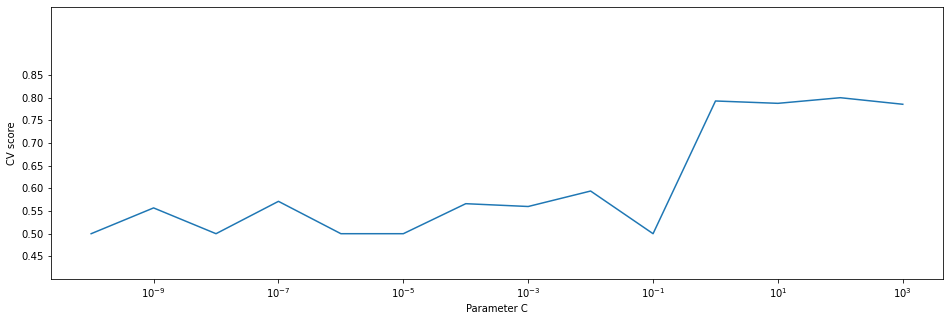

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(16,5)
plt.semilogx(costs, scores)
locs, labels = plt.yticks()
plt.yticks(locs)
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0.4, 1)
plt.show()